# Clusterização de clientes utilizando Hierarchical Agglomerative Clustering e KMeans

A análise de clusterização se configura como uma ferramenta poderosa para a segmentação estratégica de clientes, permitindo o agrupamento de indivíduos com base em suas características principais. Essa técnica possibilita às empresas uma compreensão mais profunda do perfil de seus consumidores, abrindo caminho para a oferta direcionada de produtos e serviços que atendam às necessidades e expectativas específicas de cada grupo segmentado.

Ao implementar uma estratégia de segmentação de clientes baseada em análise de clusterização, as empresas podem alcançar um nível mais elevado de personalização, fidelizar seus clientes e alcançar um crescimento sustentável no longo prazo.

fonte dos dados: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering/download?datasetVersionNumber=1

**Dicionário dos dados:**
1. **ID (Customer ID)**:
A variável ID representa o identificador único de cada cliente.

2. **Sexo (Gender)**:
0: Masculino
1: Feminino

3. **Estado Civil (Marital Status)**:
0: Solteiro
1: Casado/Divorciado/Viúvo

4. **Idade (Age)**:
A variável Idade representa a idade do cliente em anos.

5. **Escolaridade (Education Level)**:
0: Sem escolaridade
1: Ensino médio
2: Ensino superior
4: Pós-graduação

7. **Renda (Income)**:
A variável Renda representa a renda anual do cliente em dólares.

8. **Ocupação (Occupation)**:
0: Desempregado/Não Qualificado
1: Funcionário Qualificado/Oficial
2: Gerencial/Autônomo/Altamente Qualificado/Oficial

9. **Tamanho da cidade do cliente (Settlement size)**:
0: cidade pequena
1: cidade de médio porte
2: cidade de grande porte


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Carregamento dos dados

In [2]:
df = pd.read_csv('data/segmentation data.csv')

In [3]:
df.shape

(2000, 8)

### Tratamento dos dados

In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [7]:
# verificando se todos os cliente possuem ID único
df['ID'].value_counts()

ID
100000001    1
100001330    1
100001343    1
100001342    1
100001341    1
            ..
100000662    1
100000661    1
100000660    1
100000659    1
100002000    1
Name: count, Length: 2000, dtype: int64

In [8]:
# Eliminando a coluna de ID que não será utilizada nas analises etatísticas
df_clean = df.drop('ID', axis=1)

In [9]:
df_clean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [10]:
# Aplicação da padranização pois as variáveis estão em escalas distintas
# Exemplo: Age= 30, Income=10000.00
# As variáveis passam a ter média = 0 e desvio padrão = 1
df_pad = df_clean.apply(zscore, ddof=1)
df_pad.mean().round(2), df_pad.std()

(Sex                0.0
 Marital status     0.0
 Age                0.0
 Education         -0.0
 Income             0.0
 Occupation        -0.0
 Settlement size    0.0
 dtype: float64,
 Sex                1.0
 Marital status     1.0
 Age                1.0
 Education          1.0
 Income             1.0
 Occupation         1.0
 Settlement size    1.0
 dtype: float64)

### Estatísticas descritivas

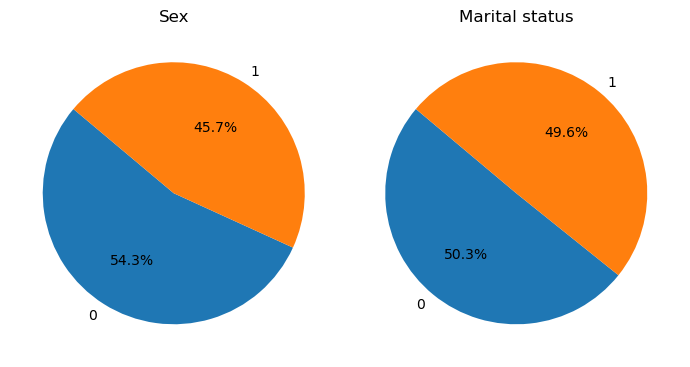

In [11]:
sex_counts = df_clean['Sex'].value_counts()
marital_status_counts = df_clean['Marital status'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(7, 5))

# 'Sex
axs[0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Sex')

# 'Marital status'
axs[1].pie(marital_status_counts.values, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Marital status')

plt.tight_layout()
plt.show()

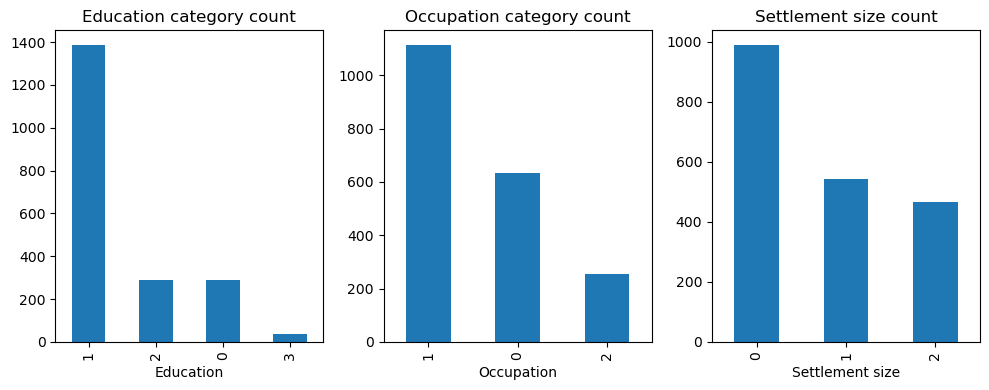

In [12]:
education_counts = df_clean['Education'].value_counts().sort_values(ascending=False)
occupation_counts = df_clean['Occupation'].value_counts().sort_values(ascending=False)
settlement_counts = df_clean['Settlement size'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(1, 3, figsize=(10,4))

education_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Education category count')

occupation_counts.plot(kind='bar', ax=ax[1])
ax[1].set_title('Occupation category count')

settlement_counts.plot(kind='bar', ax=ax[2])
ax[2].set_title('Settlement size count')


plt.tight_layout()

C:\Users\atend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


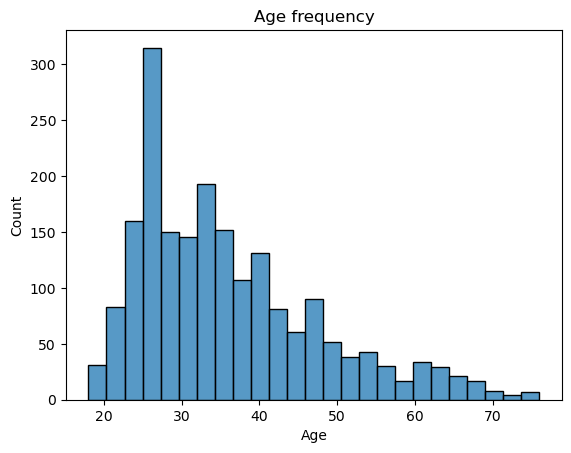

In [13]:
sns.histplot(df_clean['Age'])
plt.title('Age frequency')
plt.show()

C:\Users\atend\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


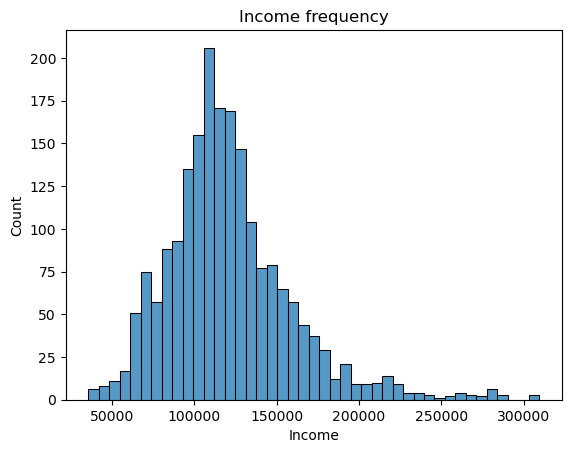

In [14]:
sns.histplot(df_clean['Income'])
plt.title('Income frequency')
plt.show()

In [15]:
df_clean.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<Axes: >

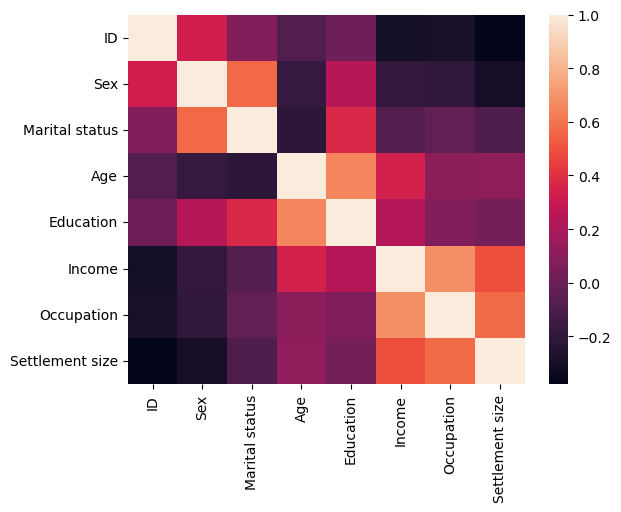

In [16]:
# Avaliando correlação entre as variáveis
sns.heatmap(data=df.corr())

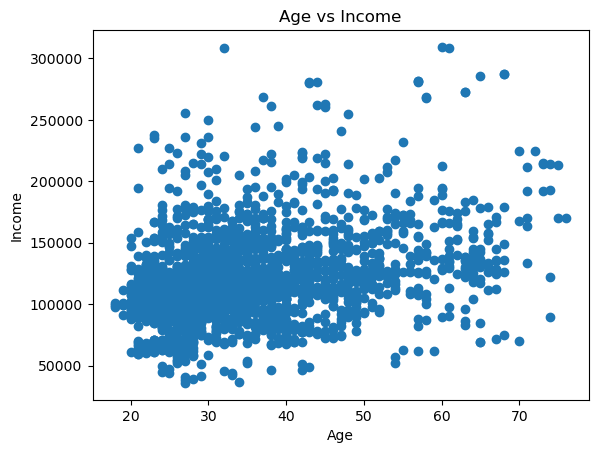

In [17]:
plt.scatter(x='Age', y='Income', data=df_clean)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

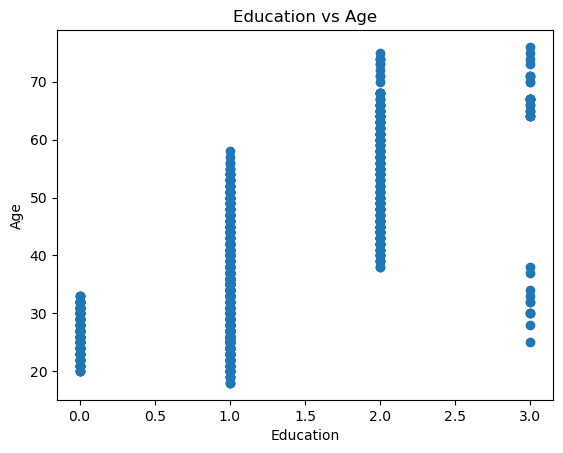

In [18]:
plt.scatter(x='Education', y='Age', data=df_clean)
plt.title("Education vs Age")
plt.xlabel("Education")
plt.ylabel("Age")
plt.show()

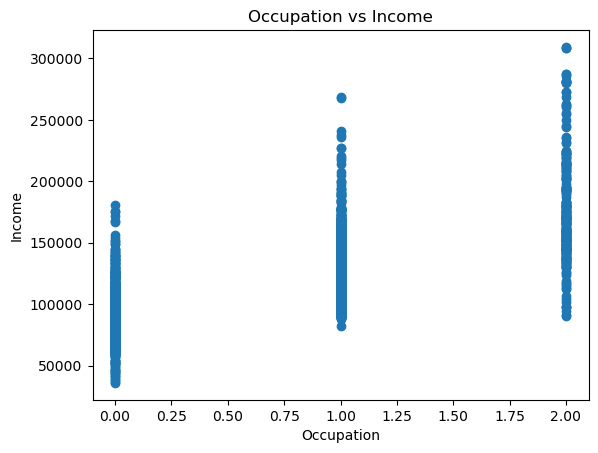

In [19]:
# Avaliando a correlação entre "Occupation" e "Income"
plt.scatter(x='Occupation', y='Income', data=df_clean)
plt.title('Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()

### Identificação da quantidade de clusters Kmeans

C:\Users\atend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atend\anaconda3\Lib\site-packages\sklearn\clust

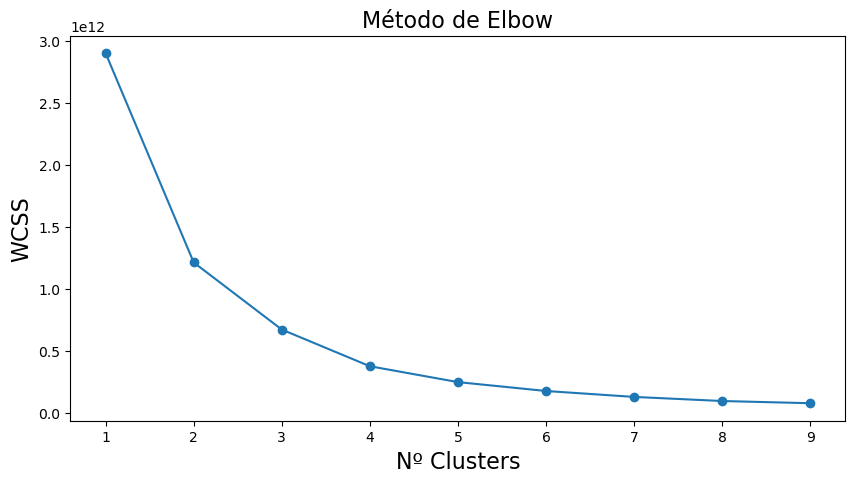

In [20]:
# utilizaremos o método de elbow (cotovelo) para identificar qual o total de clusters mais adequado.
elbow = []
K = range(1,10)
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=0).fit(df_clean)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,10))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

### Identificação dos clusters kmeans

In [21]:
kmeans = KMeans(n_clusters=3, init='random', random_state=0).fit(df_pad)
kmeans_clusters = kmeans.labels_
df_kmeans = df_clean.copy()
df_kmeans['cluster_kmeans'] = kmeans_clusters
df_kmeans['cluster_kmeans'] = df_kmeans['cluster_kmeans'].astype('category')

C:\Users\atend\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


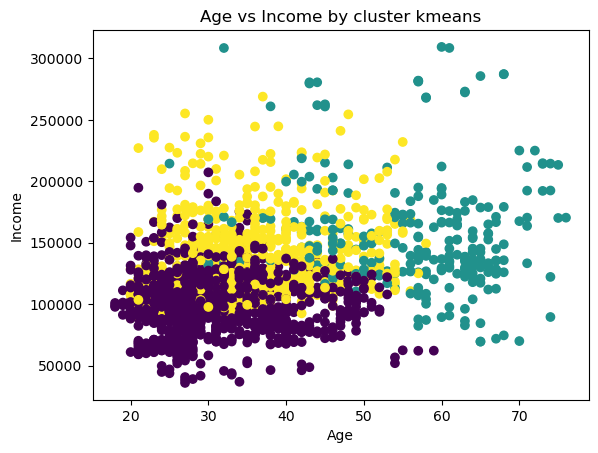

In [22]:
# Perspectiva 1
plt.scatter(x='Age', y='Income', c='cluster_kmeans', data=df_kmeans)
plt.title('Age vs Income by cluster kmeans')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig('age_vs_income_kmeans.png')
plt.show()

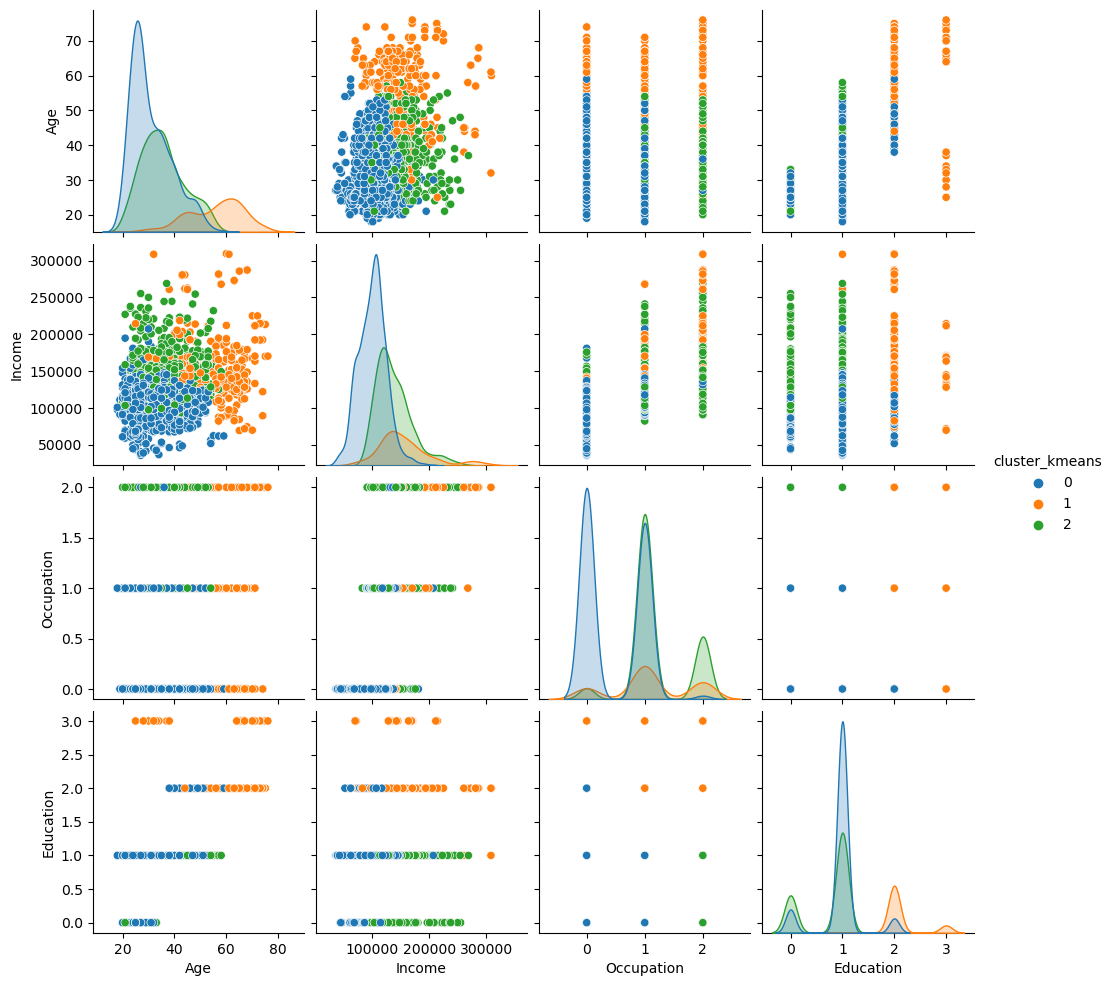

In [23]:
# Perspectiva geral
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df_kmeans[['Age', 'Income', 'Occupation', 'Education', 'cluster_kmeans']], hue="cluster_kmeans")

### Resultados cluster Kmeans

In [24]:
df_kmeans = df_kmeans.groupby(by=['cluster_kmeans'])
tab_medias_grupo = df_kmeans.mean().T
tab_desc_grupo = df_kmeans.describe().T

In [25]:
tab_medias_grupo

cluster_kmeans,0,1,2
Sex,0.738072,0.492593,0.032717
Marital status,0.677702,0.670370,0.165007
Age,30.896787,55.874074,35.563300
Education,0.963973,2.125926,0.728307
Income,100147.120740,156526.225926,137689.422475
Occupation,0.468354,1.100000,1.199147
Settlement size,0.275560,1.081481,1.284495


In [26]:
tab_desc_grupo

cluster_kmeans                     0              1              2
Sex             count    1027.000000     270.000000     703.000000
                mean        0.738072       0.492593       0.032717
                std         0.439898       0.500874       0.178021
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       0.000000
                50%         1.000000       0.000000       0.000000
                75%         1.000000       1.000000       0.000000
                max         1.000000       1.000000       1.000000
Marital status  count    1027.000000     270.000000     703.000000
                mean        0.677702       0.670370       0.165007
                std         0.467584       0.470952       0.371451
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       0.000000
                50%         1.000000       1.000000       0.000000
                75%         1.000000       1.000000       0.000000
                max         1.000000       1.000000       1.000000
Age             count    1027.000000     270.000000     703.000000
                mean       30.896787      55.874074      35.563300
                std         7.814932      10.412981       8.372977
                min        18.000000      25.000000      20.000000
                25%        25.000000      47.000000      29.000000
                50%        28.000000      57.500000      35.000000
                75%        36.000000      64.000000      41.000000
                max        59.000000      76.000000      58.000000
Education       count    1027.000000     270.000000     703.000000
                mean        0.963973       2.125926       0.728307
                std         0.387005       0.354045       0.445149
                min         0.000000       1.000000       0.000000
                25%         1.000000       2.000000       0.000000
                50%         1.000000       2.000000       1.000000
                75%         1.000000       2.000000       1.000000
                max         2.000000       3.000000       1.000000
Income          count    1027.000000     270.000000     703.000000
                mean   100147.120740  156526.225926  137689.422475
                std     24263.379053   46982.157200   32073.717337
                min     35832.000000   69487.000000   82398.000000
                25%     83385.500000  127466.250000  114925.000000
                50%    101350.000000  145270.000000  130808.000000
                75%    114761.500000  171616.000000  153513.500000
                max    207262.000000  309364.000000  268906.000000
Occupation      count    1027.000000     270.000000     703.000000
                mean        0.468354       1.100000       1.199147
                std         0.516512       0.668739       0.495161
                min         0.000000       0.000000       0.000000
                25%         0.000000       1.000000       1.000000
                50%         0.000000       1.000000       1.000000
                75%         1.000000       2.000000       1.000000
                max         2.000000       2.000000       2.000000
Settlement size count    1027.000000     270.000000     703.000000
                mean        0.275560       1.081481       1.284495
                std         0.564561       0.781304       0.723143
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       1.000000
                50%         0.000000       1.000000       1.000000
                75%         0.000000       2.000000       2.000000
                max         2.000000       2.000000       2.000000

In [27]:
kmeans_silhouette = silhouette_score(df_pad, kmeans_clusters)
kmeans_silhouette

0.2656730655333015

### Identificação dos clusters método hierárquico aglomerativo

In [28]:
cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(df_pad)
df_agglo = df_clean.copy()
df_agglo['cluster_complete'] = indica_cluster_comp
df_agglo['cluster_complete'] = df_agglo['cluster_complete'].astype('category')

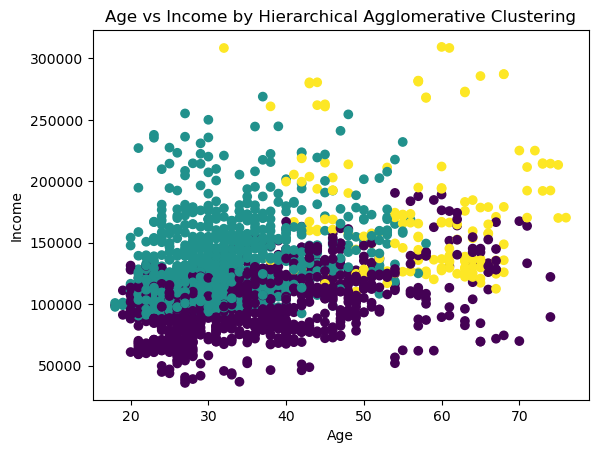

In [29]:
# Perspectiva 1
plt.scatter(x='Age', y='Income', c='cluster_complete', data=df_agglo)
plt.title('Age vs Income by Hierarchical Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig('teste.png')
plt.show()

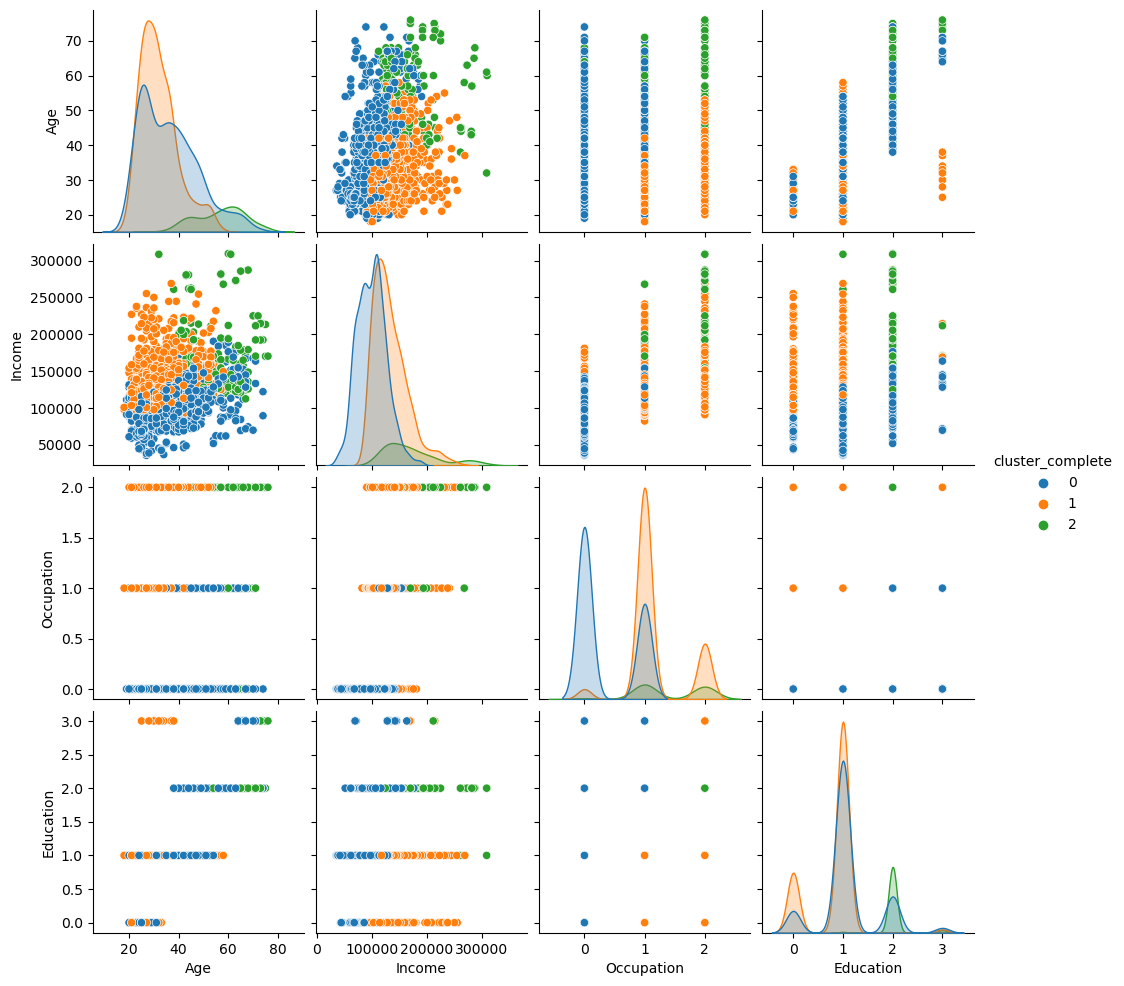

In [30]:
# Perspectiva geral
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df_agglo[['Age', 'Income', 'Occupation', 'Education', 'cluster_complete']], hue="cluster_complete")

### Resultados cluster hierárquico aglomerativo

In [31]:
df_agglo = df_agglo.groupby(by=['cluster_complete'])
tab_medias_grupo_agglo = df_agglo.mean().T
tab_desc_grupo_agglo = df_agglo.describe().T

In [32]:
tab_medias_grupo_agglo

cluster_complete,0,1,2
Sex,0.505400,0.416122,0.410256
Marital status,0.542117,0.438998,0.564103
Age,36.272138,32.002179,56.743590
Education,1.102592,0.805011,2.025641
Income,99838.042117,133415.004357,172973.314103
Occupation,0.356371,1.164488,1.423077
Settlement size,0.311015,1.053377,1.429487


In [33]:
tab_desc_grupo_agglo

cluster_complete                   0              1              2
Sex             count     926.000000     918.000000     156.000000
                mean        0.505400       0.416122       0.410256
                std         0.500241       0.493183       0.493464
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       0.000000
                50%         1.000000       0.000000       0.000000
                75%         1.000000       1.000000       1.000000
                max         1.000000       1.000000       1.000000
Marital status  count     926.000000     918.000000     156.000000
                mean        0.542117       0.438998       0.564103
                std         0.498492       0.496535       0.497471
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       0.000000
                50%         1.000000       0.000000       1.000000
                75%         1.000000       1.000000       1.000000
                max         1.000000       1.000000       1.000000
Age             count     926.000000     918.000000     156.000000
                mean       36.272138      32.002179      56.743590
                std        11.571513       7.686751       9.725836
                min        18.000000      18.000000      32.000000
                25%        26.000000      26.000000      49.000000
                50%        35.000000      31.000000      58.000000
                75%        43.000000      36.000000      64.000000
                max        74.000000      58.000000      76.000000
Education       count     926.000000     918.000000     156.000000
                mean        1.102592       0.805011       2.025641
                std         0.564972       0.478658       0.225724
                min         0.000000       0.000000       1.000000
                25%         1.000000       1.000000       2.000000
                50%         1.000000       1.000000       2.000000
                75%         1.000000       1.000000       2.000000
                max         3.000000       3.000000       3.000000
Income          count     926.000000     918.000000     156.000000
                mean    99838.042117  133415.004357  172973.314103
                std     26005.176195   31421.914391   50456.391642
                min     35832.000000   82398.000000  107585.000000
                25%     81072.500000  109996.250000  133199.500000
                50%    100332.500000  126133.000000  160265.000000
                75%    116025.500000  150441.750000  194619.500000
                max    190518.000000  268906.000000  309364.000000
Occupation      count     926.000000     918.000000     156.000000
                mean        0.356371       1.164488       1.423077
                std         0.479186       0.457772       0.545225
                min         0.000000       0.000000       0.000000
                25%         0.000000       1.000000       1.000000
                50%         0.000000       1.000000       1.000000
                75%         1.000000       1.000000       2.000000
                max         1.000000       2.000000       2.000000
Settlement size count     926.000000     918.000000     156.000000
                mean        0.311015       1.053377       1.429487
                std         0.634527       0.773318       0.643701
                min         0.000000       0.000000       0.000000
                25%         0.000000       0.000000       1.000000
                50%         0.000000       1.000000       2.000000
                75%         0.000000       2.000000       2.000000
                max         2.000000       2.000000       2.000000

In [34]:
agglo_silhouette = silhouette_score(df_pad, indica_cluster_comp)
agglo_silhouette

0.1311763674012545